<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [5]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [8]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

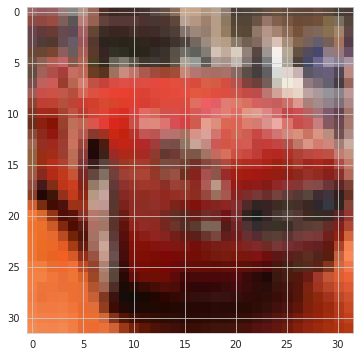

In [9]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [10]:
y_train[5]

array([1], dtype=uint8)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [14]:
# pd.Series(y_train.flatten()).value_counts()

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
classes[y_train[0][0]]# classes[6]

'frog'

In [18]:
classes[int(y_train[0])] # classes[6]

'frog'

In [19]:
#int(np.random.randint(low=0, high=50000, size=1))

In [20]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

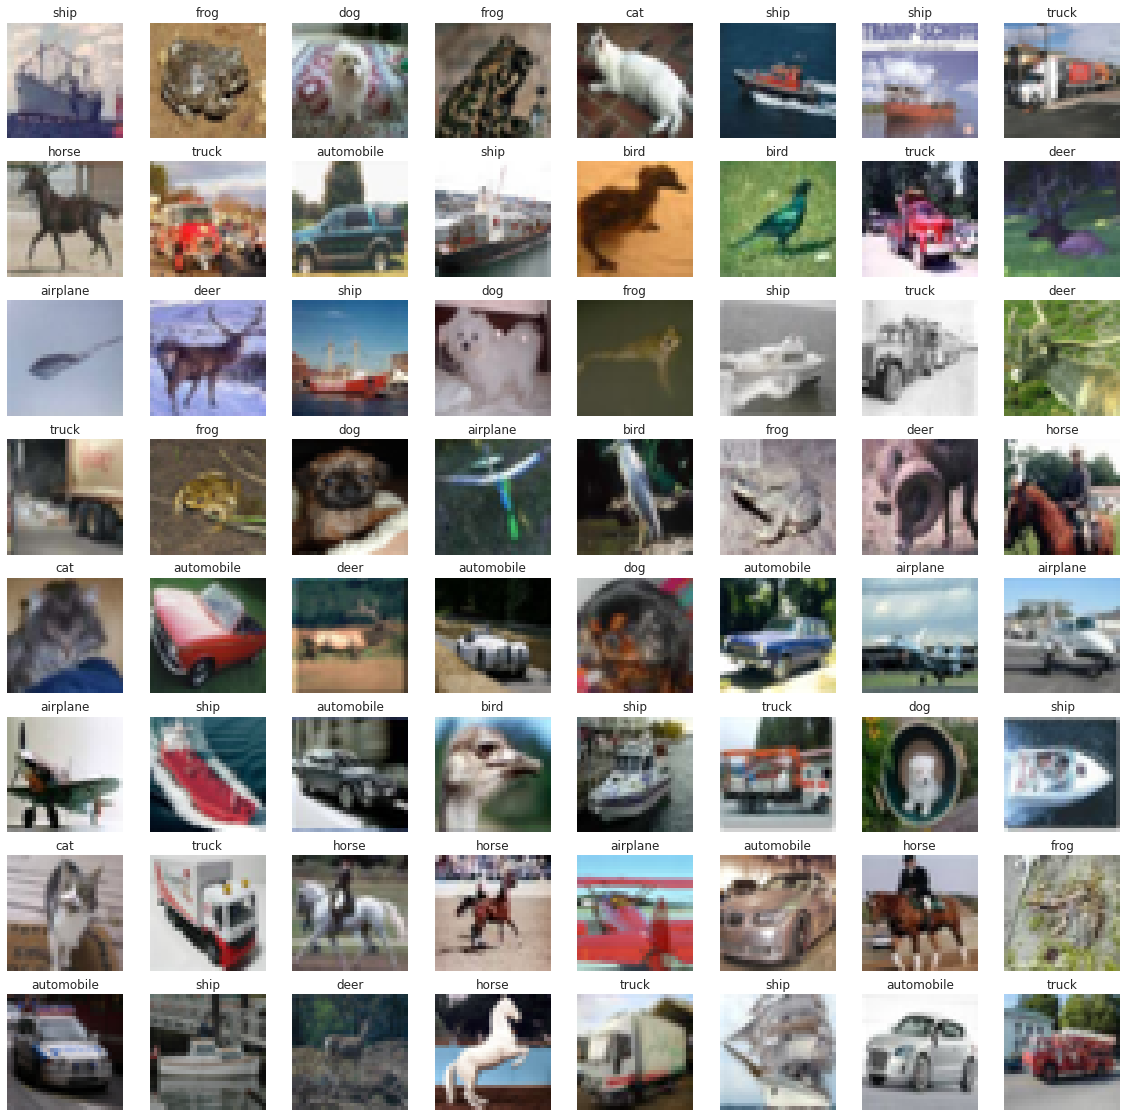

In [21]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [22]:
X_train[5].min()

0

In [23]:
X_train[5].max()

252

In [24]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
X_train[5].min()

0.0

In [26]:
X_train[5].max()

0.9882353

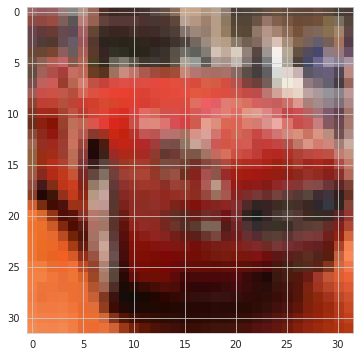

In [27]:
plt.imshow(X_train[5])

In [28]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [29]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [32]:
y_train[0]

array([6], dtype=uint8)

In [33]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [99]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [101]:
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [103]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4290 - accuracy: 0.4821 - val_loss: 1.1932 - val_accuracy: 0.5796
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0486 - accuracy: 0.6299 - val_loss: 0.9602 - val_accuracy: 0.6612
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9045 - accuracy: 0.6830 - val_loss: 0.9233 - val_accuracy: 0.6721
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8071 - accuracy: 0.7157 - val_loss: 0.9002 - val_accuracy: 0.6825
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7241 - accuracy: 0.7454 - val_loss: 0.8582 - val_accuracy: 0.7023
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6524 - accuracy: 0.7710 - val_loss: 0.8596 - val_accuracy: 0.7082
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5885 - accuracy: 0.7924 - val_loss: 0.8837 - val_accuracy:

In [104]:
model.metrics_names

['loss', 'accuracy']

In [105]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,1.429,0.482,1.193,0.580
1,1.049,0.630,0.960,0.661
2,0.904,0.683,0.923,0.672
3,0.807,0.716,0.900,0.683
4,0.724,0.745,0.858,0.702
5,0.652,0.771,0.860,0.708
6,0.588,0.792,0.884,0.706


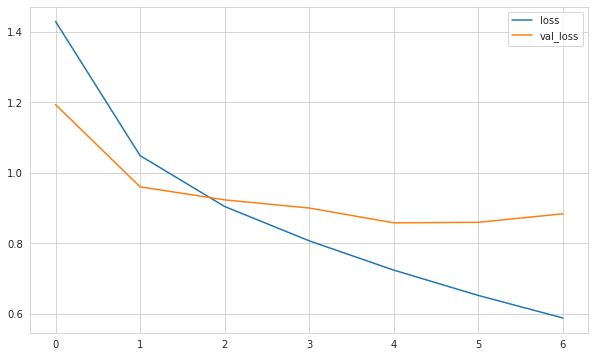

In [106]:
summary[["loss", "val_loss"]].plot();

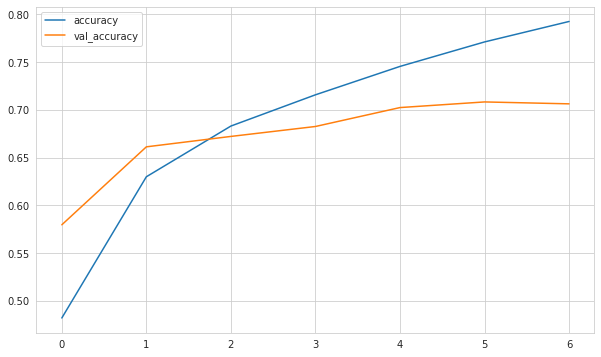

In [107]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8545 - accuracy: 0.7050


[0.8545422554016113, 0.7049999833106995]

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8545422554016113
Test accuracy: 0.7049999833106995


In [47]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.6949598e-02, 1.3358394e-03, 8.8687027e-03, ..., 2.7675962e-03,
        1.0260889e-02, 3.4207564e-03],
       [1.2297964e-02, 6.6390532e-01, 1.6101574e-05, ..., 7.2636333e-08,
        3.2157207e-01, 2.2042838e-03],
       [4.5823157e-01, 1.1358878e-01, 3.0813277e-02, ..., 8.7899053e-03,
        3.1601900e-01, 6.4874895e-02],
       ...,
       [4.9039256e-04, 1.1175778e-05, 2.4364576e-02, ..., 2.1967048e-02,
        2.3367067e-04, 2.1240416e-04],
       [4.2026178e-03, 6.8443909e-02, 1.1425040e-02, ..., 3.3030973e-03,
        1.3205328e-03, 3.1397364e-04],
       [2.0601958e-06, 2.3993232e-06, 7.3455252e-05, ..., 9.6047795e-01,
        1.2846841e-06, 8.4464800e-06]], dtype=float32)

In [48]:
y_pred = np.argmax(pred_prob, axis=1)

In [49]:
y_pred

array([5, 1, 0, ..., 5, 4, 7])

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      1000
           1       0.80      0.82      0.81      1000
           2       0.65      0.56      0.60      1000
           3       0.55      0.41      0.47      1000
           4       0.66      0.63      0.65      1000
           5       0.54      0.72      0.61      1000
           6       0.83      0.73      0.77      1000
           7       0.76      0.80      0.78      1000
           8       0.83      0.80      0.82      1000
           9       0.80      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [51]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [52]:
print(confusion_matrix(y_test, y_pred))

[[813  16  32  16  16   6   5  14  54  28]
 [ 30 823   9   3   3   4   5   5  26  92]
 [ 86   8 558  40  99 109  35  48   6  11]
 [ 47  15  71 413  69 265  47  39  16  18]
 [ 34   4  79  51 629  67  42  78  13   3]
 [ 25   4  30 115  38 718  11  37  12  10]
 [ 12   9  48  73  43  62 727   8  13   5]
 [ 22   4  18  23  42  84   0 797   2   8]
 [ 97  42   4   7   7  12   1   7 803  20]
 [ 52  99   8  10   2   9   5  21  25 769]]


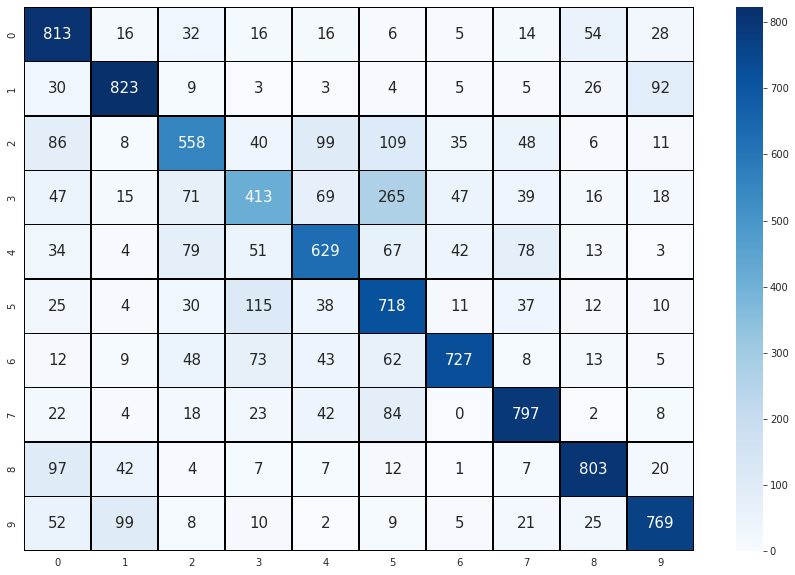

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [114]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

In [116]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4502 - accuracy: 0.4752 - val_loss: 1.0682 - val_accuracy: 0.6297
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0346 - accuracy: 0.6355 - val_loss: 0.9470 - val_accuracy: 0.6715
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8963 - accuracy: 0.6840 - val_loss: 0.8481 - val_accuracy: 0.7110
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8219 - accuracy: 0.7118 - val_loss: 0.7933 - val_accuracy: 0.7240
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7598 - accuracy: 0.7336 - val_loss: 0.7572 - val_accuracy: 0.7391
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7139 - accuracy: 0.7464 - val_loss: 0.7609 - val_accuracy: 0.7397
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6712 - accuracy: 0.7616 - val_loss: 0.7226 - val_ac

In [117]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.450,0.475,1.068,0.630
1,1.035,0.636,0.947,0.672
2,0.896,0.684,0.848,0.711
3,0.822,0.712,0.793,0.724
4,0.760,0.734,0.757,0.739
5,0.714,0.746,0.761,0.740
6,0.671,0.762,0.723,0.750
7,0.640,0.774,0.718,0.752
8,0.612,0.783,0.715,0.756
9,0.589,0.792,0.675,0.767


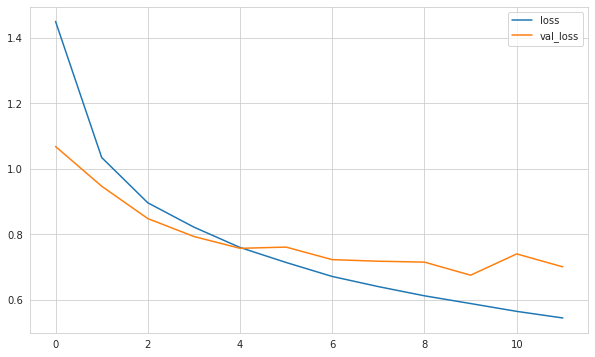

In [118]:
summary[["loss", "val_loss"]].plot();

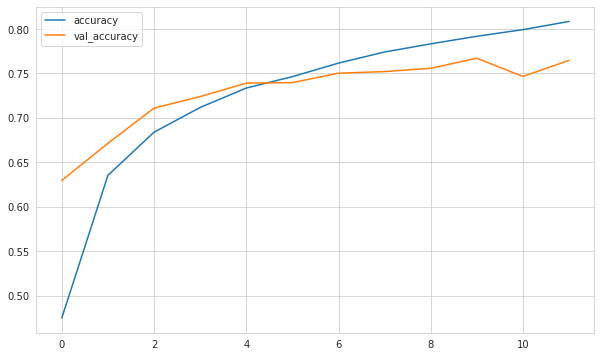

In [119]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [60]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6869 - accuracy: 0.7630


[0.6869239211082458, 0.7630000114440918]

In [61]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6869239211082458
Test accuracy: 0.7630000114440918


In [62]:
pred_prob = model.predict(X_test)

In [63]:
y_pred = np.argmax(pred_prob, axis=1)

In [64]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1000
           1       0.85      0.91      0.88      1000
           2       0.75      0.56      0.64      1000
           3       0.62      0.53      0.57      1000
           4       0.69      0.75      0.72      1000
           5       0.68      0.66      0.67      1000
           6       0.74      0.89      0.80      1000
           7       0.79      0.82      0.80      1000
           8       0.87      0.86      0.87      1000
           9       0.85      0.86      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



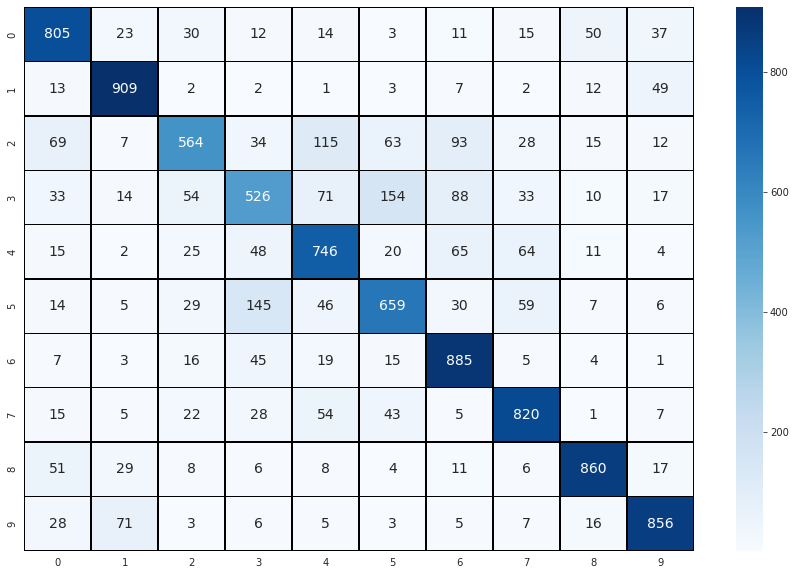

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [67]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [68]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [69]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [71]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 19s 11ms/step - loss: 1.9836 - accuracy: 0.2933 - val_loss: 2.0890 - val_accuracy: 0.2910
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4645 - accuracy: 0.4678 - val_loss: 1.4220 - val_accuracy: 0.4999
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2614 - accuracy: 0.5595 - val_loss: 1.2192 - val_accuracy: 0.5723
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1238 - accuracy: 0.6142 - val_loss: 0.9914 - val_accuracy: 0.6503
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0245 - accuracy: 0.6525 - val_loss: 0.8682 - val_accuracy: 0.7050
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9469 - accuracy: 0.6852 - val_loss: 0.7889 - val_accuracy: 0.7319
Epoch 7/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8904 - accuracy: 0.7043 - val_loss: 0.8877 -

In [72]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
3,1.124,0.614,0.991,0.650
4,1.024,0.652,0.868,0.705
5,0.947,0.685,0.789,0.732
6,0.890,0.704,0.888,0.697
7,0.838,0.726,0.850,0.726


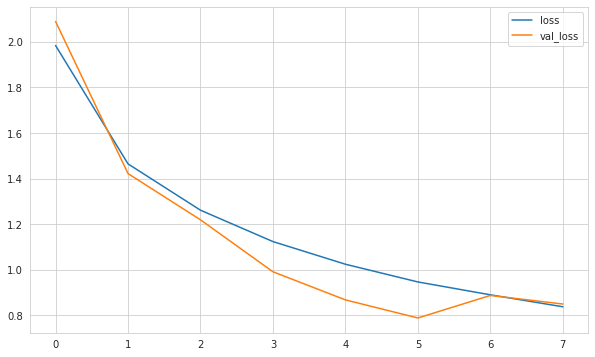

In [73]:
summary[["loss", "val_loss"]].plot();

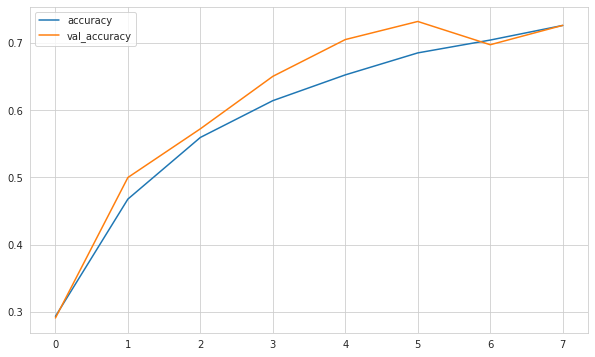

In [74]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [75]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.7889 - accuracy: 0.7319


[0.7888853549957275, 0.7318999767303467]

In [76]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7888853549957275
Test accuracy: 0.7318999767303467


In [77]:
pred_prob = model.predict(X_test)

In [78]:
y_pred = np.argmax(pred_prob, axis=1)

In [79]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1000
           1       0.88      0.88      0.88      1000
           2       0.68      0.53      0.59      1000
           3       0.54      0.56      0.55      1000
           4       0.69      0.72      0.70      1000
           5       0.66      0.55      0.60      1000
           6       0.57      0.93      0.70      1000
           7       0.89      0.69      0.78      1000
           8       0.88      0.85      0.87      1000
           9       0.84      0.88      0.86      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000



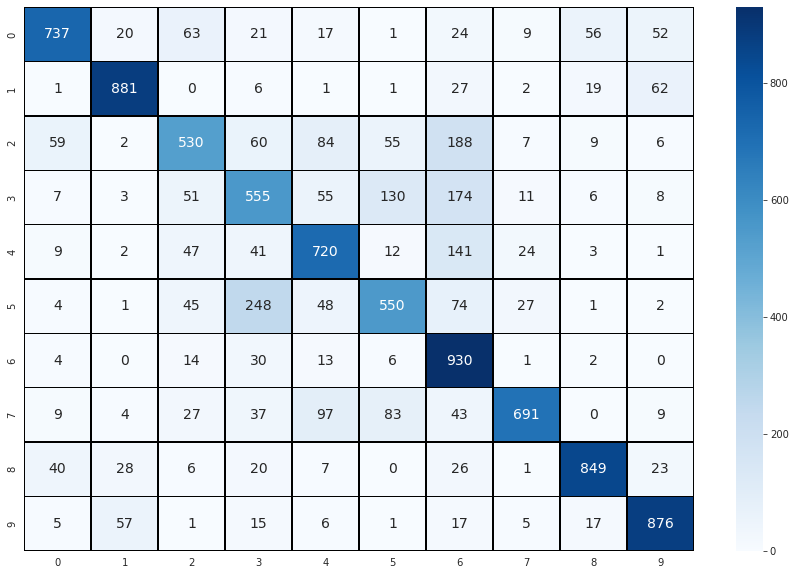

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [120]:
my_image = X_test[40]

In [121]:
my_image.shape

(32, 32, 3)

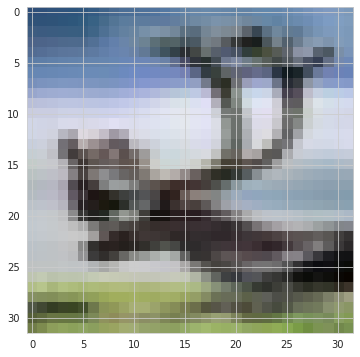

In [122]:
plt.imshow(my_image)

In [123]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [124]:
image_prediction

array([[5.7758544e-02, 7.6479913e-04, 9.5571183e-02, 8.8015506e-03,
        8.0749780e-01, 1.6113048e-02, 1.9371816e-03, 4.8699672e-03,
        4.7736764e-03, 1.9122085e-03]], dtype=float32)

In [125]:
np.argmax(image_prediction, axis=1)

array([4])

In [126]:
result=np.argmax(image_prediction, axis=1)

In [127]:
result

array([4])

In [128]:
classes[int(result)]

'deer'

In [91]:
model.save("cnn-1.h5")

# finished

In [92]:
model=tf.keras.models.load_model('cnn-1.h5')

In [93]:
X_test[15].shape

(32, 32, 3)

In [94]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [95]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [96]:
np.argmax(pred)

8

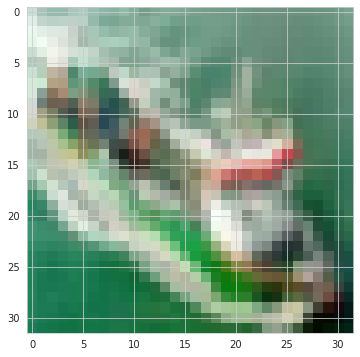

In [97]:
plt.imshow(X_test[15])

In [98]:
classes[8]

'ship'